In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [44]:
#Cargamos dataset train en un dataframe
tweets_train = pd.read_csv('Dataset/train.csv')
tweets_test = pd.read_csv('Dataset/test.csv')
tweets_submission = pd.read_csv('Dataset/sample_submission.csv') 

In [45]:
tweets_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [46]:
x = tweets_train.text
y = tweets_train.target

In [47]:
#Separamos al dataset tweets_train en un set de entrenamiento y uno de validacion, para text y para target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
#Bag of Words 
#Vectorizamos los textos de cada tweet
count_vect = CountVectorizer()
tweets_train_counts = count_vect.fit_transform(x_train)
tweets_test_counts = count_vect.transform(x_test)
tweets_train_counts.shape

(6090, 18566)

In [49]:
#TFIDF
tfidf_transformer = TfidfTransformer()
tweets_train_tfidf = tfidf_transformer.fit_transform(tweets_train_counts)
tweets_test_tfidf = tfidf_transformer.transform(tweets_test_counts)
tweets_train_tfidf.shape

(6090, 18566)

In [50]:
#Naive Bayes
tweets_train_NB = MultinomialNB().fit(tweets_train_tfidf, y_train)

In [51]:
predicted = tweets_train_NB.predict(tweets_test_tfidf)
np.mean(predicted == y_test)

0.7997373604727511

In [52]:
test_text = tweets_test.text
test_text_counts = count_vect.transform(test_text)
test_text_tfidf = tfidf_transformer.transform(test_text_counts)
test_target_predicted = tweets_train_NB.predict(test_text_tfidf)

In [53]:
tweets_submission.target = test_target_predicted
tweets_submission.to_csv("submission.csv",index=False)

Text(0, 0.5, 'Cantidad de tweets')

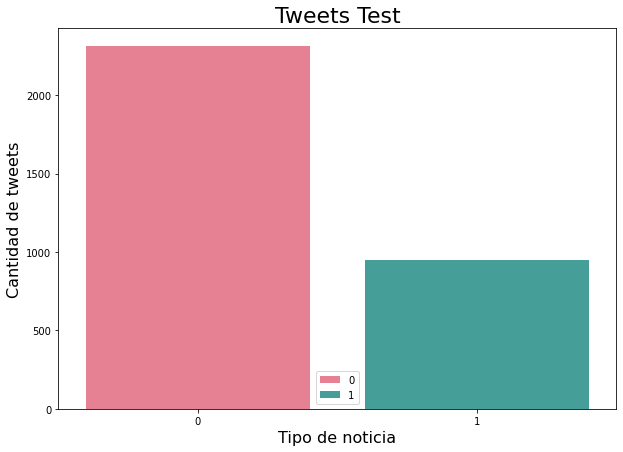

In [54]:
plt.figure(figsize=(10,7))
g = sns.barplot(x= tweets_submission.target.value_counts().index, y= tweets_submission.target.value_counts().values, orient='v', palette= 'husl', hue= tweets_submission.target.value_counts().index, dodge=False)
g.set_title("Tweets Test", fontsize=22)
g.set_xlabel("Tipo de noticia", fontsize=16)
g.set_ylabel("Cantidad de tweets", fontsize=16)